# KNN Classifier

## Oral Toxicity Dataset

### Imports and data loading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.neighbors import KNeighborsClassifier
import ds_functions as ds

data: pd.DataFrame = pd.read_csv('../datasets/qsar_oral_toxicity.csv', sep=';', header=None)    

### Spliting and preparing Data

In [2]:
y: np.ndarray = data.pop(1024).values # Target Variable
X: np.ndarray = data.values # Values of each feature on each record
labels = pd.unique(y)
train_size = 0.7 # % of records used for train (the remainder will be left for test)

trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=train_size, stratify=y)

In [3]:
nvalues = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25]
dist = ['manhattan', 'euclidean', 'chebyshev']

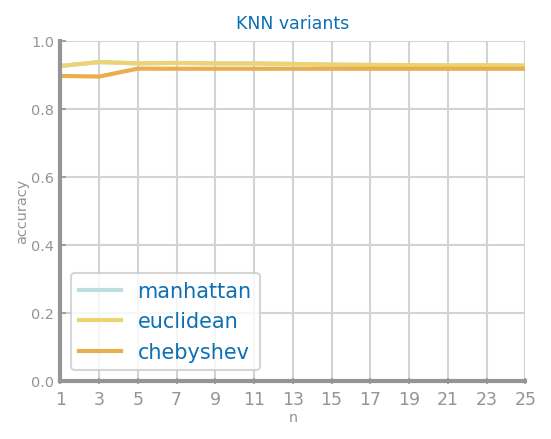

Best results with 3 neighbors and manhattan


In [4]:
values = {}
best = (0, '')
last_best = 0
for d in dist:
    yvalues = []
    for n in nvalues:
        knn = KNeighborsClassifier(n_neighbors=n, metric=d)
        knn.fit(trnX, trnY)
        prdY = knn.predict(tstX)
        yvalues.append(metrics.accuracy_score(tstY, prdY))
        if yvalues[-1] > last_best:
            best = (n, d)
            last_best = yvalues[-1]
    values[d] = yvalues

plt.figure()
ds.multiple_line_chart(nvalues, values, title='KNN variants', xlabel='n', ylabel='accuracy', percentage=True)
plt.show()
print('Best results with %d neighbors and %s'%(best[0], best[1]))

As seen in the plot above, having a high K won't increase the performance of our models. Manhattan and Chebyshev distance show a difference in performance for small Ks but all end up converging as we increase the number of neighbours. Lets see how the best model performs when it comes to the test set.

An acc of 0.94%


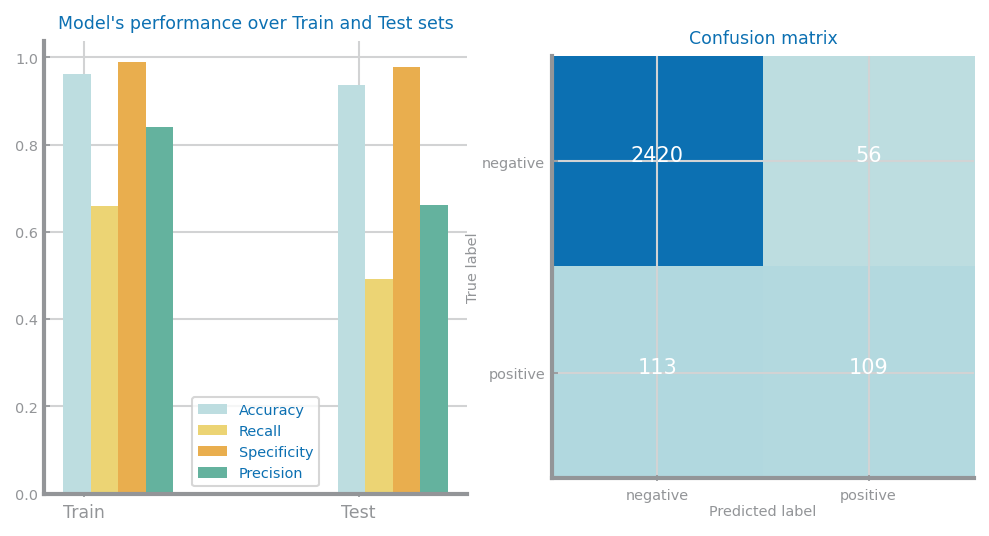

In [5]:
clf = knn = KNeighborsClassifier(n_neighbors=best[0], metric=best[1])
clf.fit(trnX, trnY)
prd_trn = clf.predict(trnX)
prd_tst = clf.predict(tstX)
ds.plot_evaluation_results(labels, trnY, prd_trn, tstY, prd_tst)
print("An acc of {:.2f}%".format(metrics.accuracy_score(tstY, prd_tst)))

## Summary
### How do models improve with the increase of neighbors?

- Manhattan and euclidean distance go hand in hand and chebyshev starts with a lower perfoemance. Still, as we increase K all the models seem to plateu and do not get better.

### How does performance changes with different distance measures?

- All the distances converge, but chebyshev seems to be the worse.

### What is the best parametrisation (number of neighbors and distance measure)?

- The best combination is K=3 and manhattan distance.

### Is the accuracy achieved good enough?

- With an acc of 94% it seems quite good, but on suha an unbalanced dataset, and with the model wronlgy identifying arround half of the positive labels, we can't really say it is good enough.

### What is the largest kind of errors?
- Positives labeled as negatives.

### Is it possible to identify overfitting?
- Does not seem like it
